In [4]:
def plot_action_cruve(file_name):
    file=open(file_name,"r")
    actions=[]
    for line in file.readlines():
        action=line.split(",")
        for a in action:
            actions.append(a)
    lst=[]
    for a in actions:
        b=a.strip('[').strip(']').split(" ")
        lst.append(b)
    
    action_values=[]
    for l in lst:
        for s in l:
            if (s!='0.' and s!=""):
                    if s!=']':
                        s=s.rstrip("]")
                        action_values.append(float(s))                  
    import matplotlib.pyplot as plt
    plt.plot(action_values)

In [5]:
def plot_rewards(file_name):
    f=open(file_name,"r")
    R=[]
    for l in f:
        for r in l.split(','):
            R.append(r)
    Rewards=[]
    for r in R:
        if r!='':
            Rewards.append(float(r))
    plt.plot(Rewards)

### 为了弄清楚噪点对模型训练的影响，用 takeoff 做测试 
#### 1. 先采用原始方案：噪点不参与模型训练，
对比 actor 生成的 raw_action 和 加了噪点后的 real_action

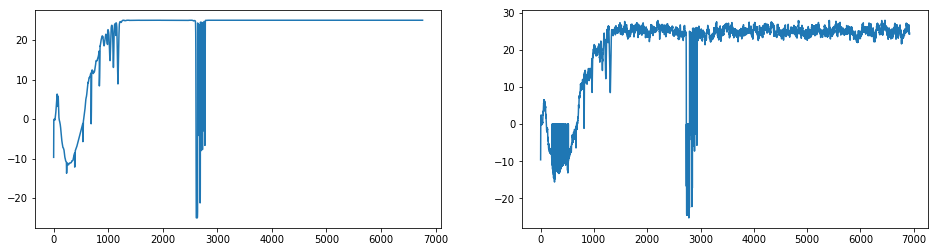

In [16]:
# 测试 1-1
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plot_action_cruve("takeoff_rawActions_1.txt")
plt.subplot(1,2,2)
plot_action_cruve("takeoff_realActions_1.txt")

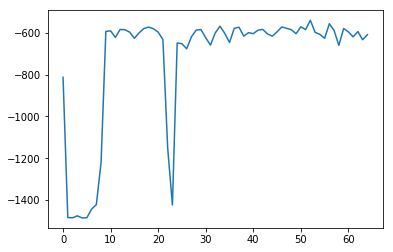

In [17]:
plot_rewards("takeoff_rewards_1.txt")

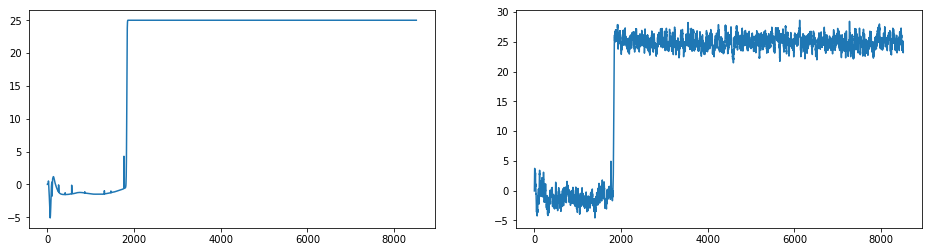

In [22]:
# 测试 1-2
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plot_action_cruve("takeoff_rawActions_4.txt")
plt.subplot(1,2,2)
plot_action_cruve("takeoff_realActions_4.txt")

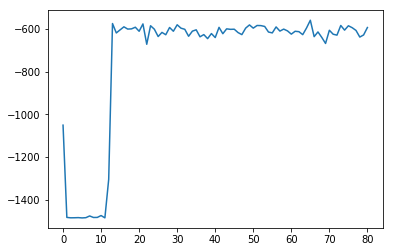

In [23]:
plot_rewards("takeoff_rewards_4.txt")

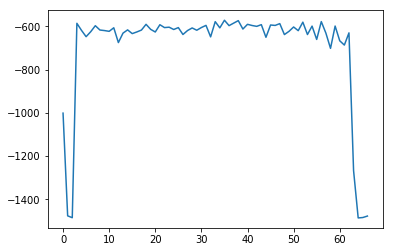

In [24]:
plot_rewards("takeoff_rewards_5.txt")

#### 2. 改变方案：把加了噪点后的action存入memory，带入模型训练

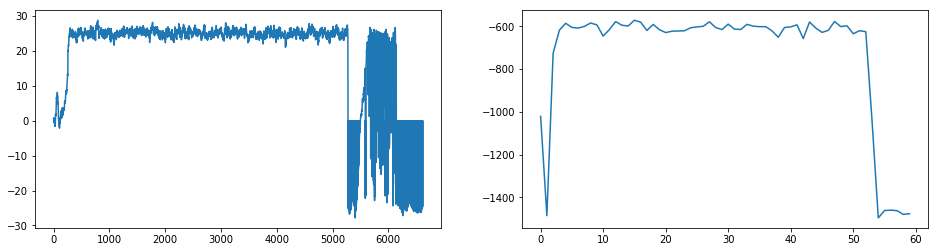

In [20]:
# 测试 2-1
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plot_action_cruve("takeoff_realActions_2.txt")
plt.subplot(1,2,2)
plot_action_cruve("takeoff_rewards_2.txt")

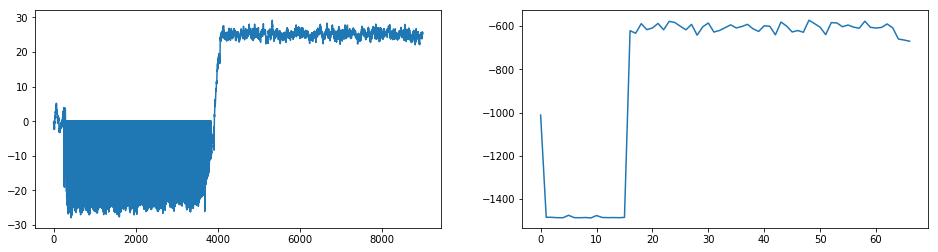

In [21]:
# 测试 2-2
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plot_action_cruve("takeoff_realActions_3.txt")
plt.subplot(1,2,2)
plot_action_cruve("takeoff_rewards_3.txt")

整体来看，第一种原始方案（噪点不参与训练）表现更稳定

#### 3. 把OUNoise的方差调回初始设定，对比测试噪点方差的影响
* 第一种方案

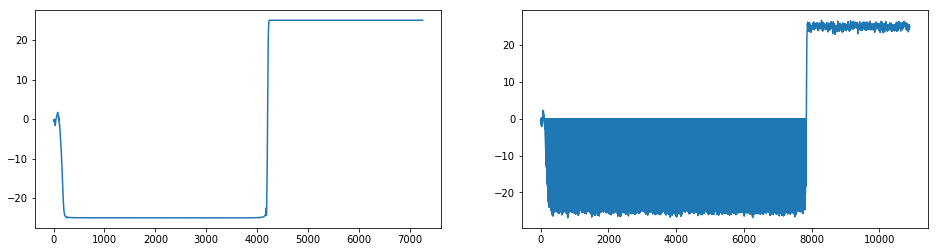

In [25]:
# 测试 3-1
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plot_action_cruve("takeoff_rawActions_6.txt")
plt.subplot(1,2,2)
plot_action_cruve("takeoff_realActions_6.txt")

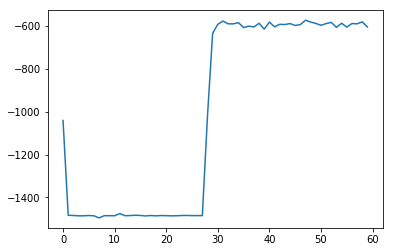

In [26]:
plot_rewards("takeoff_rewards_6.txt")

* 第二种方案

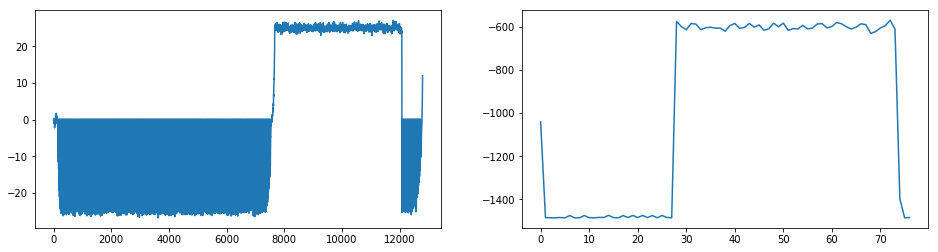

In [27]:
# 测试 3-2
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plot_action_cruve("takeoff_realActions_7.txt")
plt.subplot(1,2,2)
plot_action_cruve("takeoff_rewards_7.txt")

### 噪点测试分析总结

* 噪点方差较大会促使奖励曲线更快收敛 
* 噪点参不参与训练，对性能的in